In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle #create kaggle directory
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hassan06/nslkdd

 65% 9.00M/13.9M [00:00<00:00, 24.5MB/s]
100% 13.9M/13.9M [00:00<00:00, 34.1MB/s]


In [ ]:
zip_path='/content/nslkdd.zip'

In [ ]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
      zip_ref.extract(member)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
X_train = pd.read_table("KDDTrain+.txt", sep=",", names=datacols) # change path to where the dataset is located.
X_train = X_train.iloc[:,:-1] # removes an unwanted extra field

# Load NSL_KDD test dataset
X_test = pd.read_table("KDDTest+.txt", sep=",", names=datacols)
X_test = X_test.iloc[:,:-1]

In [ ]:
print("Train size  : ",X_train.shape)
print("Test size   : ",X_test.shape)

print("Train Split : " ,round(X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100))
print("Test Split  : " ,round(X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100))

Train size  :  (125973, 42)
Test size   :  (22544, 42)
Train Split :  85
Test Split  :  15


Combining X_train and X_test

In [ ]:
df=pd.concat([X_train,X_test])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.shape

(148517, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
cols=df.columns
cols

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

Numerical Columns Visualization

<ipython-input-15-30626c77febe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


<Axes: xlabel='duration', ylabel='Density'>

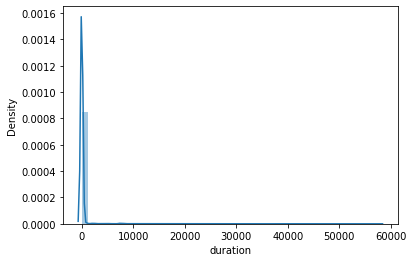

In [ ]:
sns.distplot(df['duration'])

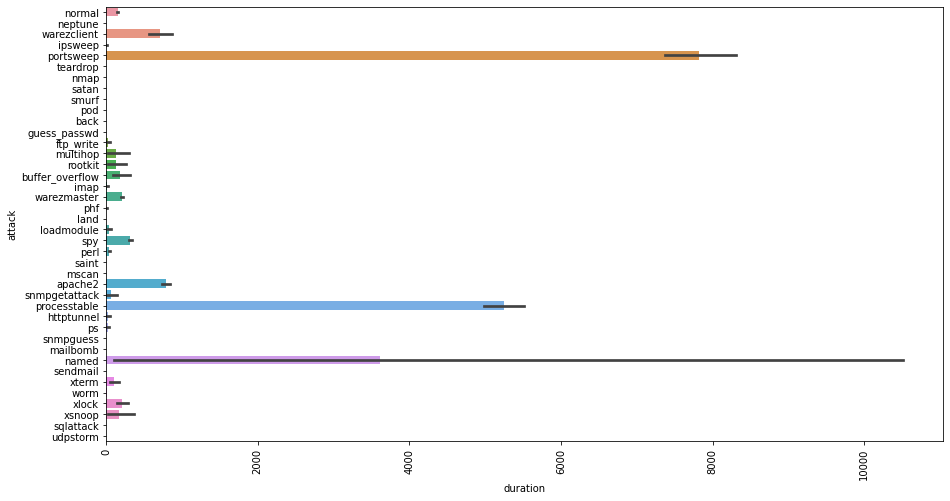

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['duration'],y=df['attack'])
plt.xticks(rotation='vertical')#to rotate the labels like apple, hp, acer etc... vertical
plt.show()

<ipython-input-17-f9a3585fecdf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_failed_logins'])


<Axes: xlabel='num_failed_logins', ylabel='Density'>

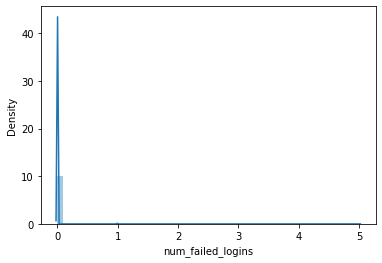

In [ ]:
sns.distplot(df['num_failed_logins'])

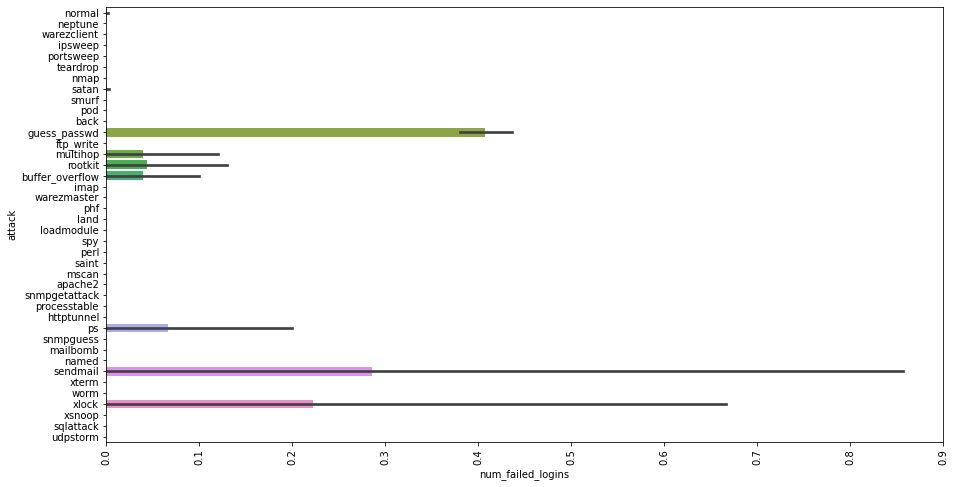

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['num_failed_logins'],y=df['attack'])
plt.xticks(rotation='vertical')#to rotate the labels like apple, hp, acer etc... vertical
plt.show()

<ipython-input-18-ba82c68f54e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dst_host_same_src_port_rate'])


<Axes: xlabel='dst_host_same_src_port_rate', ylabel='Density'>

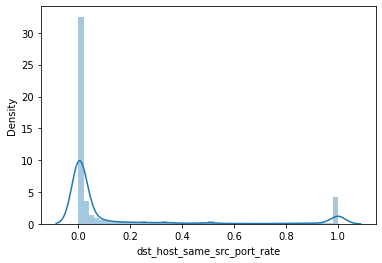

In [ ]:
sns.distplot(df['dst_host_same_src_port_rate'])

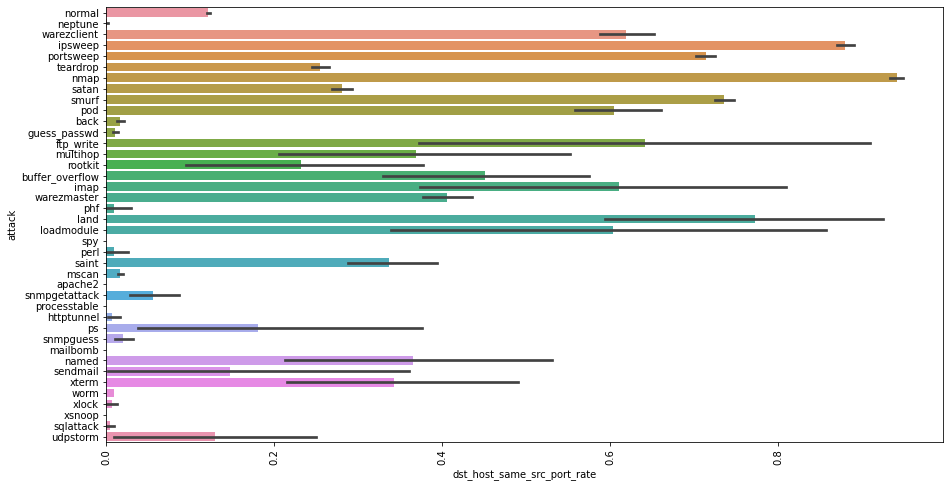

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['dst_host_same_src_port_rate'],y=df['attack'])
plt.xticks(rotation='vertical')#to rotate the labels like apple, hp, acer etc... vertical
plt.show()

<ipython-input-16-bcd5f59f71f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_compromised'])


<Axes: xlabel='num_compromised', ylabel='Density'>

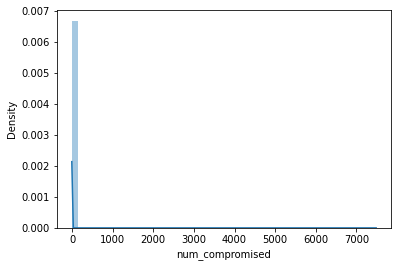

In [ ]:
sns.distplot(df['num_compromised'])

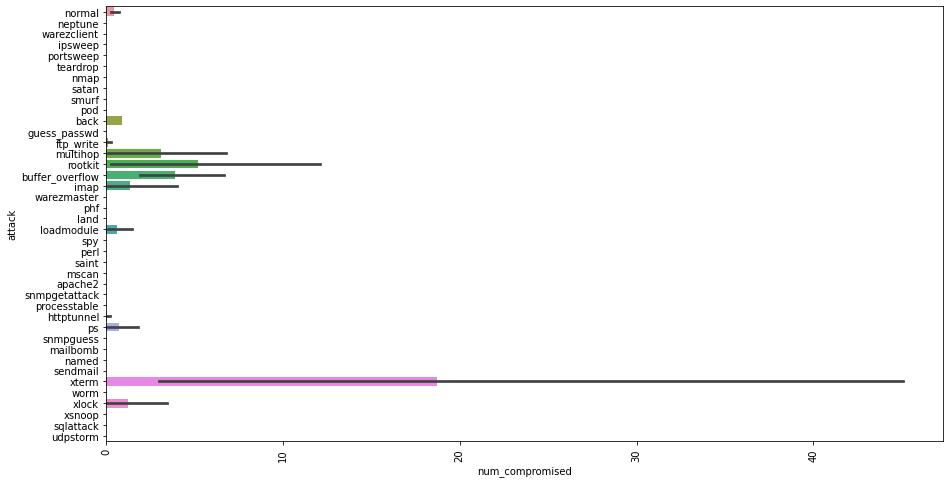

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['num_compromised'],y=df['attack'])
plt.xticks(rotation='vertical')#to rotate the labels like apple, hp, acer etc... vertical
plt.show()

Categorical Columns Visualization

<Axes: >

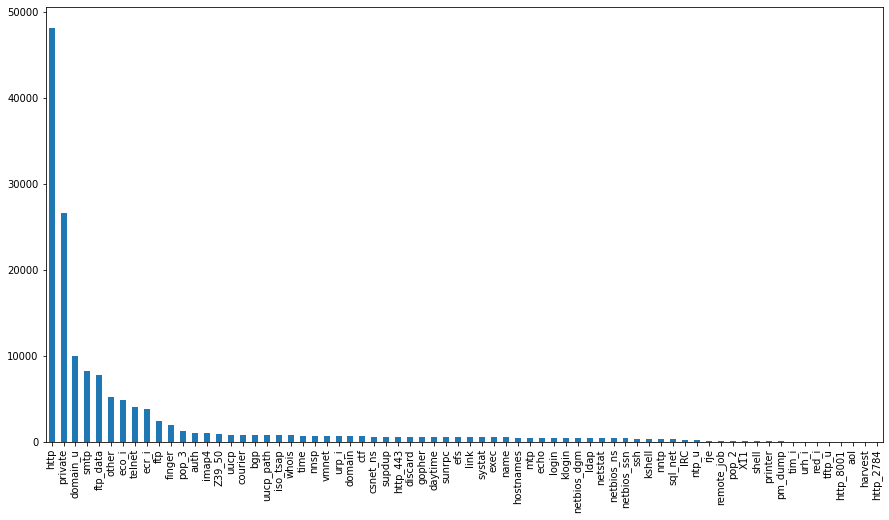

In [ ]:
plt.figure(figsize=(15,8))
df['service'].value_counts().plot(kind='bar')

<Axes: >

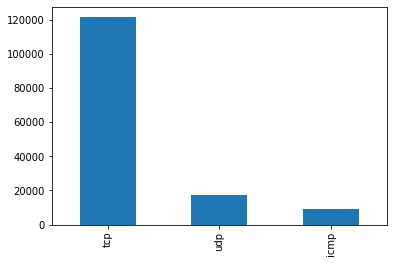

In [ ]:
df['protocol_type'].value_counts().plot(kind='bar')

<Axes: >

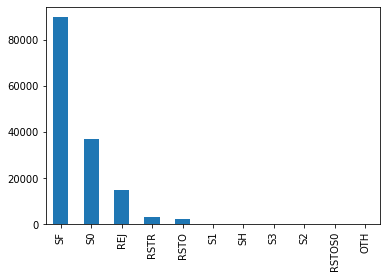

In [ ]:
df['flag'].value_counts().plot(kind='bar')

<Axes: >

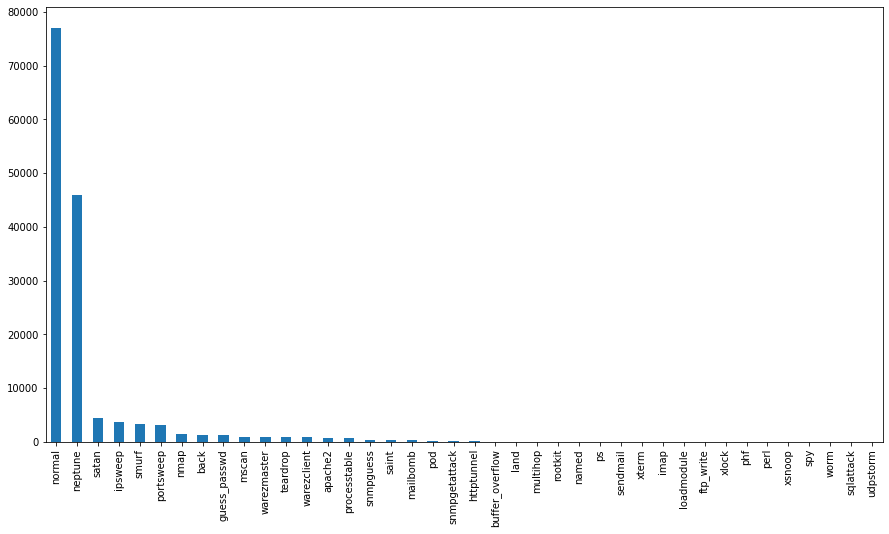

In [ ]:
plt.figure(figsize=(15,8))
df['attack'].value_counts().plot(kind='bar')

Categorical Column Analysis

In [ ]:
categorical_data=df.select_dtypes(include=['object']).copy()
categorical_data

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,back
22542,udp,domain_u,SF,normal


In [ ]:
cat_col=categorical_data.columns

In [ ]:
for i in cat_col:
  print(f'{i} - {len(categorical_data[i].unique())} - {categorical_data[i].unique()}')

protocol_type - 3 - ['tcp' 'udp' 'icmp']
service - 70 - ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag - 11 - ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
attack - 40 - ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl'

In [ ]:
target=df['attack']
target.shape

(148517,)

In [ ]:
print(target)

0         normal
1         normal
2        neptune
3         normal
4         normal
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: attack, Length: 148517, dtype: object


In [ ]:
df1=df.copy()

In [ ]:
df1.drop(['attack'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# encode the categorical attributes
cat = categorical_data.apply(encoder.fit_transform)
print(cat)

# 3 categories
# 1, 2 , 3

# 1 0 0
# 0 1 0
# 0 0 1

       protocol_type  service  flag  attack
0                  1       20     9      16
1                  2       44     9      16
2                  1       49     5      14
3                  1       24     9      16
4                  1       24     9      16
...              ...      ...   ...     ...
22539              1       54     9      16
22540              1       24     9      16
22541              1       24     9       1
22542              2       12     9      16
22543              1       57     1      11

[148517 rows x 4 columns]


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
for col in df1.columns:
   if df1[col].dtype == 'object':
      df1[col]= label_encoder.fit_transform(df1[col])

In [ ]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Correlation

In [ ]:
print("Highest correlation per column")
corr_matrix = df1.corr()
np.fill_diagonal(corr_matrix.values, 0)

# high_corr_columns=[]

# find column with highest correlation for each column in the DataFrame
column1=[]
column2=[]
correlation_val=[]
for col in df1.columns:
    max_corr_col = corr_matrix[col].idxmax()
    max_corr_val = corr_matrix[col][max_corr_col]
    column1.append(col)
    column2.append(max_corr_col)
    correlation_val.append(max_corr_val)
    print(f"{col} - {max_corr_col} : {max_corr_val}")
    # if(max_corr_val>0.8):
    #   high_corr_columns.append(max_corr_col)

Highest correlation per column
duration - dst_host_diff_srv_rate : 0.22363508216990224
protocol_type - dst_host_count : 0.22678200817050534
service - dst_host_diff_srv_rate : 0.2744309315906973
flag - same_srv_rate : 0.7225296673163564
src_bytes - duration : 0.06895856592861466
dst_bytes - duration : 0.03405558342162899
land - dst_host_srv_diff_host_rate : 0.07211885053606096
wrong_fragment - protocol_type : 0.15807225890153334
urgent - root_shell : 0.17831159470289326
hot - is_guest_login : 0.720316579449493
num_failed_logins - is_guest_login : 0.07869151445442898
logged_in - dst_host_srv_count : 0.6181499726600836
num_compromised - num_root : 0.9987247769091526
root_shell - su_attempted : 0.5394076298905655
su_attempted - num_access_files : 0.5459846159124494
num_root - num_compromised : 0.9987247769091526
num_file_creations - num_access_files : 0.09238041115277852
num_shells - root_shell : 0.1871734374468035
num_access_files - su_attempted : 0.5459846159124494
num_outbound_cmds - nu

In [ ]:
df_correlation=pd.DataFrame({
    'Column1':column1,
    'Column2': column2,
    'Correlation':correlation_val
})
df_correlation

,Column1,Column2,Correlation
0,duration,dst_host_diff_srv_rate,0.223635
1,protocol_type,dst_host_count,0.226782
2,service,dst_host_diff_srv_rate,0.274431
3,flag,same_srv_rate,0.722530
4,src_bytes,duration,0.068959
5,dst_bytes,duration,0.034056
6,land,dst_host_srv_diff_host_rate,0.072119
7,wrong_fragment,protocol_type,0.158072
8,urgent,root_shell,0.178312
9,hot,is_guest_login,0.720317


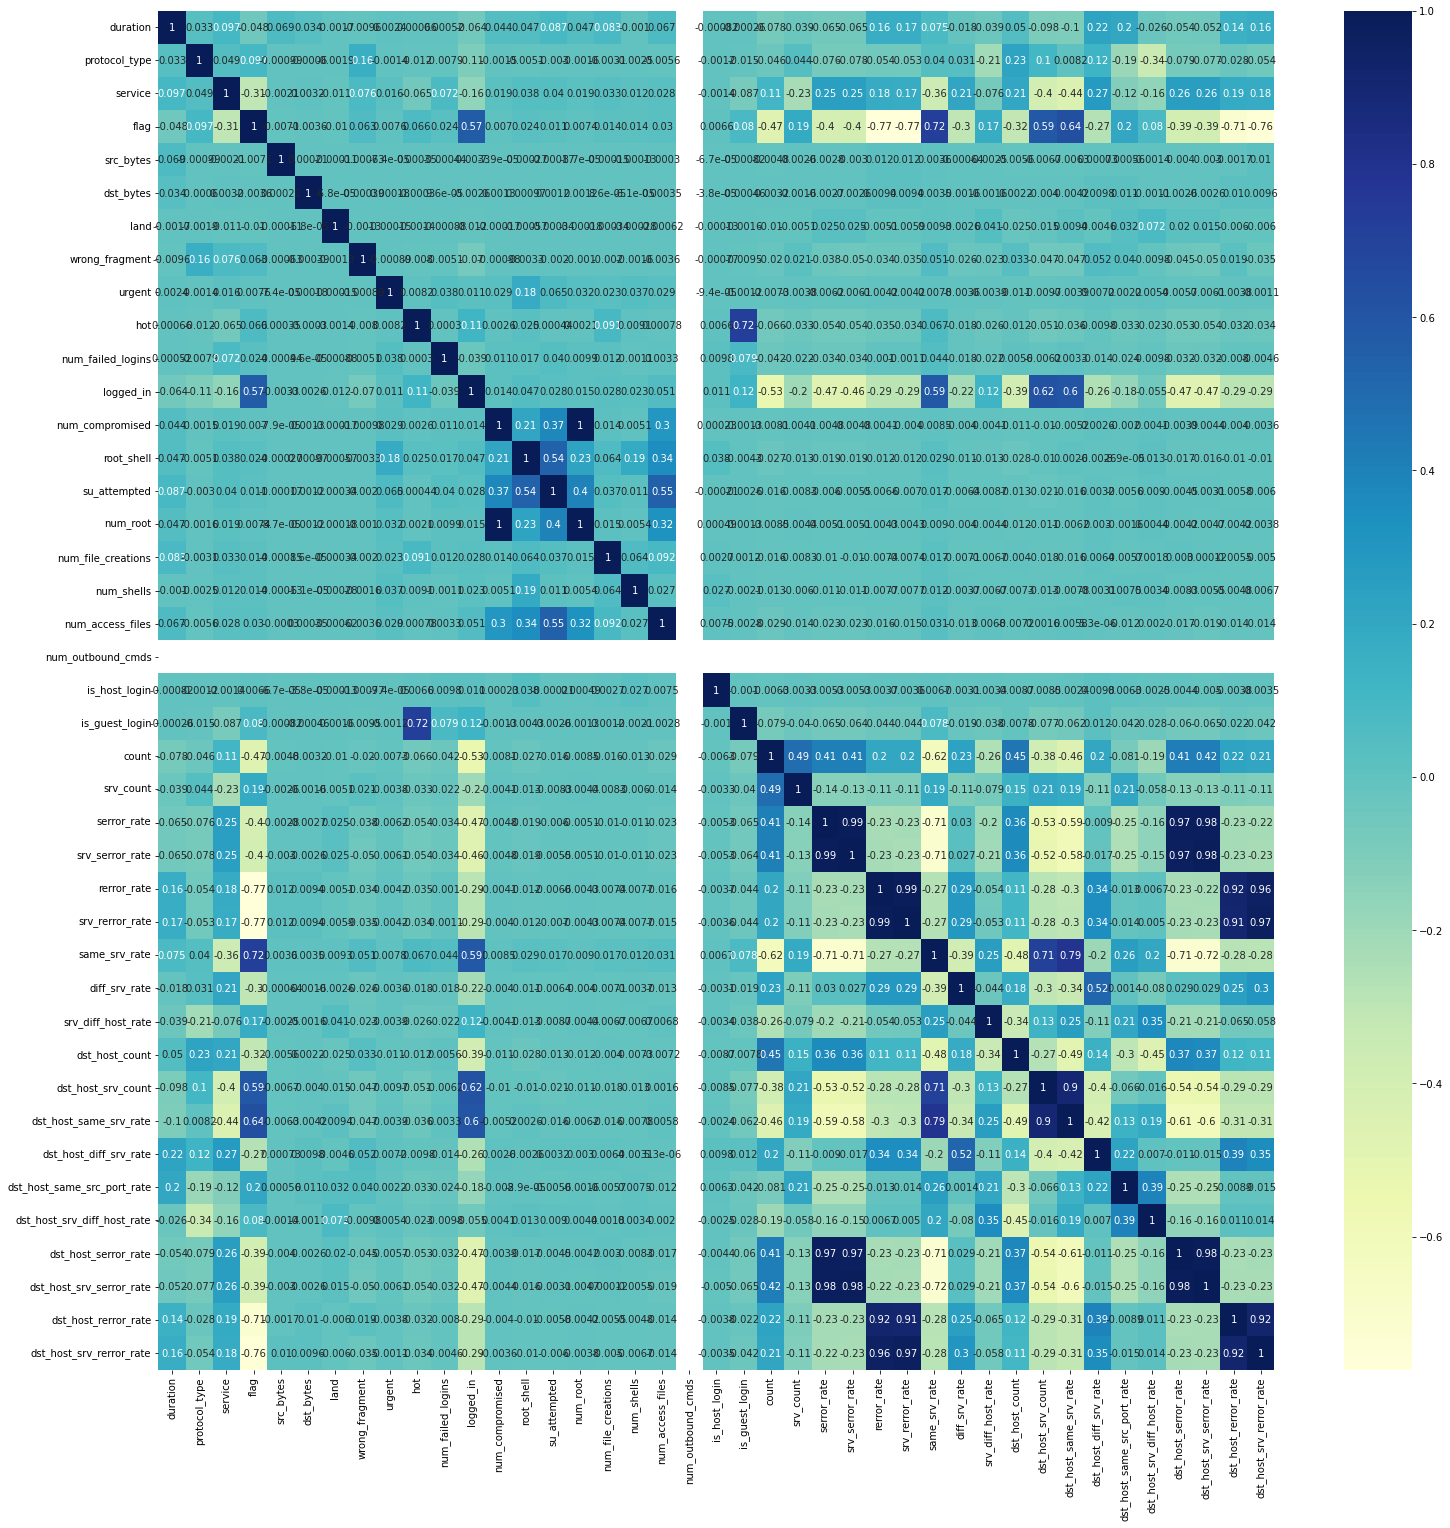

In [ ]:
# keep columns where there are more than 1 unique values
# df1 = df1[[col for col in df1 if df1[col].nunique() > 1]]
plt.figure(figsize=(25,25))
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the heatmap, we can infer that:
- **num_compromised** is highly correlated with num_root column.
- **serror_rate** is highly correlated with srv_serror_rate, dst_host_serror_rate and dst_host_srv_serror_rate.
- **rerror_rate** is highly correlated with srv_rerror_rate, dst_host_rerror_rate and dst_host_srv_rerror_rate.
- **dst_host_same_srv_rate** is correlated with dst_host_srv_count

In general, highly correlated variables indicates redundant data and may lead to overfitting. It can also lead to issues with model interpretability and can also cause instability during classification.

In [ ]:
print("Correlation Values: \n")

corr1 = df1['num_root'].corr(df1['num_compromised'])
print(f'{"{:.4f}".format(corr1)} : num_root - num_compromised')

corr2 = df1['serror_rate'].corr(df1['srv_serror_rate'])
print(f'{"{:.4f}".format(corr2)} : serror_rate - srv_serror_rate')

corr3 = df1['serror_rate'].corr(df1['dst_host_serror_rate'])
print(f'{"{:.4f}".format(corr3)} : serror_rate - dst_host_serror_rate')

corr4 = df1['serror_rate'].corr(df1['dst_host_srv_serror_rate'])
print(f'{"{:.4f}".format(corr4)} : serror_rate - dst_host_srv_serror_rate')

corr5 = df1['rerror_rate'].corr(df1['srv_rerror_rate'])
print(f'{"{:.4f}".format(corr5)} : rerror_rate - srv_rerror_rate')

corr6 = df1['rerror_rate'].corr(df1['dst_host_rerror_rate'])
print(f'{"{:.4f}".format(corr6)} : rerror_rate - dst_host_rerror_rate')

corr7 = df1['rerror_rate'].corr(df1['dst_host_srv_rerror_rate'])
print(f'{"{:.4f}".format(corr7)} : rerror_rate - dst_host_srv_rerror_rate')

corr8 = df1['dst_host_same_srv_rate'].corr(df1['dst_host_srv_count'])
print(f'{"{:.4f}".format(corr8)} : dst_host_same_srv_rate - dst_host_srv_count')

Correlation Values: 

0.9987 : num_root - num_compromised
0.9915 : serror_rate - srv_serror_rate
0.9747 : serror_rate - dst_host_serror_rate
0.9760 : serror_rate - dst_host_srv_serror_rate
0.9861 : rerror_rate - srv_rerror_rate
0.9169 : rerror_rate - dst_host_rerror_rate
0.9574 : rerror_rate - dst_host_srv_rerror_rate
0.8982 : dst_host_same_srv_rate - dst_host_srv_count


Hence we will drop the following columns:

- num_root
- srv_serror_rate
- dst_host_serror_rate
- dst_host_srv_serror_rate
- srv_rerror_rate
- dst_host_rerror_rate
- dst_host_srv_rerror_rate
- dst_host_same_srv_rate

In [ ]:
high_corr_columns=['num_root','srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate','srv_rerror_rate','dst_host_rerror_rate', 'dst_host_srv_rerror_rate','dst_host_same_srv_rate']

In [ ]:
for col in high_corr_columns:
  df1.drop(col, axis = 1, inplace = True)

In [ ]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,20,9,491,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00
1,0,2,44,9,146,0,0,0,0,0,...,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00
2,0,1,49,5,0,0,0,0,0,0,...,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04
4,0,1,24,9,199,420,0,0,0,0,...,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00


We also notice that num_outbounds_cmds have only a sigle value. It doesnt provide andy variablity and is not relevent to the analysis process. So we drop it.

In [ ]:
df1.drop(['num_outbound_cmds'], axis=1, inplace=True)

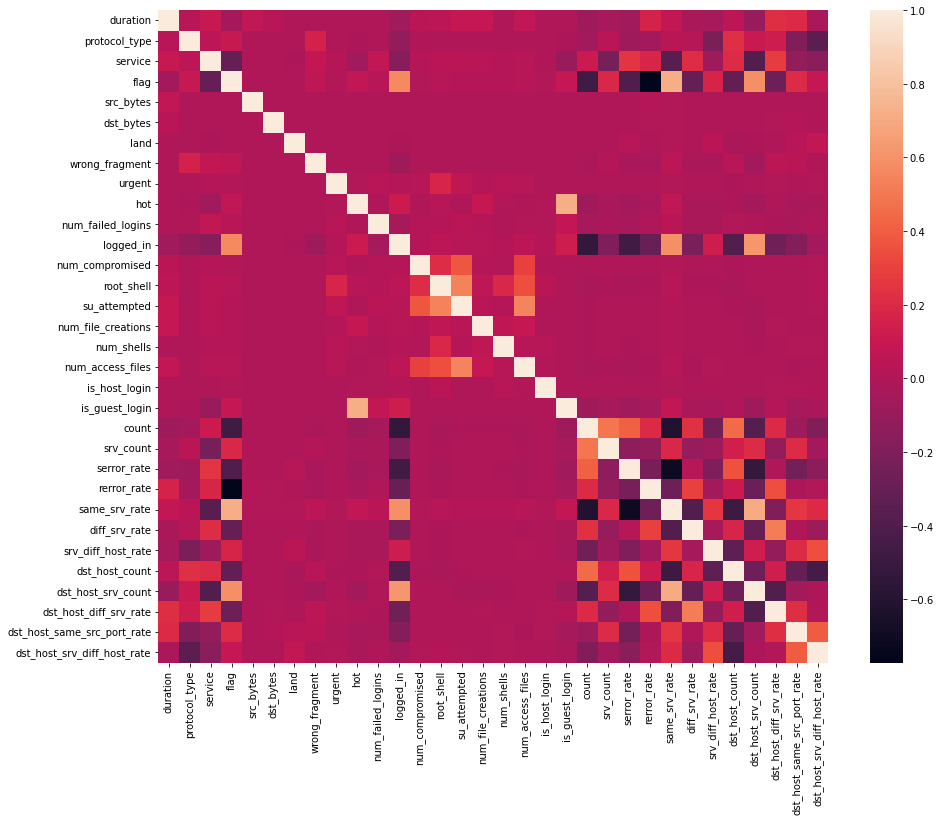

In [ ]:
corr2 = df1.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr2)

plt.show()

In [ ]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,20,9,491,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00
1,0,2,44,9,146,0,0,0,0,0,...,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00
2,0,1,49,5,0,0,0,0,0,0,...,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04
4,0,1,24,9,199,420,0,0,0,0,...,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00


Normalization

In [ ]:
from sklearn import preprocessing
numeric_columns = df1.select_dtypes(include=['int', 'float']).columns

scaler = preprocessing.MinMaxScaler()
df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])

In [ ]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.03,0.17,0.00
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.60,0.88,0.00
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.05,0.00,0.00
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,0.2,0.0,1.00,0.00,0.00,0.117647,1.000000,0.00,0.03,0.04
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,0.00,0.00,0.00


In [ ]:
df2=df1.copy()

Handling Outliers using Zscore

In [ ]:
from scipy import stats
import numpy as np

for col in df2.columns:
  # calculate the Z-scores for each data point
  z_scores = np.abs(stats.zscore(df2[col]))

  # identify the outliers
  threshold = 2.5
  outliers = np.where(z_scores > threshold)[0]

  # remove or replace the outliers
  df2 = df2.reset_index(drop=True) # reset index
  df2.drop(outliers, axis=0)

In [ ]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.03,0.17,0.00
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.60,0.88,0.00
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.05,0.00,0.00
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,...,0.2,0.0,1.00,0.00,0.00,0.117647,1.000000,0.00,0.03,0.04
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.0,0.5,0.782609,0.9,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.00,0.00,0.00,0.392157,0.552941,0.06,0.01,0.01
148513,0.0,0.5,0.347826,0.9,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.00,0.00,0.18,0.772549,1.000000,0.00,0.01,0.01
148514,0.0,0.5,0.347826,0.9,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,...,0.0,0.0,1.00,0.00,0.20,1.000000,1.000000,0.00,0.00,0.00
148515,0.0,1.0,0.173913,0.9,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.00,0.00,0.33,1.000000,0.988235,0.01,0.00,0.00


Handling Outliers using IQR

In [ ]:
df3=df1.copy()

In [ ]:
# create an array of data
for col in df3.columns:
  data = np.array(df3[col])
  # calculate the IQR
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1

  # identify the outliers
  threshold = 1.5
  lower_bound = q1 - (threshold * iqr)
  upper_bound = q3 + (threshold * iqr)
  outliers = np.where((data < lower_bound) | (data > upper_bound))[0]

  # remove or replace the outliers
  df3 = df3.reset_index(drop=True) # reset index
  df3 = df3.drop(outliers, axis=0)

In [ ]:
df3

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.0,0.5,0.710145,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.05,0.07,0.0,1.0,0.101961,0.05,0.0,0.0
1,0.0,0.5,0.710145,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.05,0.06,0.0,1.0,0.035294,0.05,0.0,0.0
2,0.0,0.5,0.710145,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.14,0.06,0.0,1.0,0.058824,0.07,0.0,0.0
3,0.0,0.5,0.739130,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.09,0.05,0.0,1.0,0.090196,0.05,0.0,0.0
4,0.0,0.5,0.710145,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.06,0.06,0.0,1.0,0.050980,0.06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28943,0.0,0.5,0.710145,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.08,0.08,0.0,1.0,0.047059,0.08,0.0,0.0
28944,0.0,0.5,0.405797,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.03,0.06,0.0,1.0,0.027451,0.07,0.0,0.0
28945,0.0,0.5,0.304348,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.07,0.07,0.0,1.0,0.070588,0.08,0.0,0.0
28946,0.0,0.5,0.057971,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.01,0.09,0.0,1.0,0.003922,0.08,0.0,0.0


Handling Outliers using Winsorization

In [ ]:
df4=df1.copy()

In [ ]:
from scipy.stats.mstats import winsorize

# create an array of data
for col in df3.columns:
  # create an array of data
  data = np.array(df3[col])
  # winsorize the data
  winsorized_data = winsorize(data, limits=[0.05, 0.05])

In [ ]:
winsorized_data

masked_array(data=[0., 0., 0., ..., 0., 0., 0.],
             mask=False,
       fill_value=1e+20)

In [ ]:
def val_count(x):
  return x.value_counts()

In [ ]:
# Attack Class Distribution
attack_freq_df1 = df[['attack']].apply(val_count)

attack_freq_df1['frequency_percent'] = round((100 * attack_freq_df1 / attack_freq_df1.sum()),2)
attack_freq_df1

,attack,frequency_percent
normal,77054,51.88
neptune,45871,30.89
satan,4368,2.94
ipsweep,3740,2.52
smurf,3311,2.23
portsweep,3088,2.08
nmap,1566,1.05
back,1315,0.89
guess_passwd,1284,0.86
mscan,996,0.67


Text(0.5, 1.0, 'Attack Class Distribution')

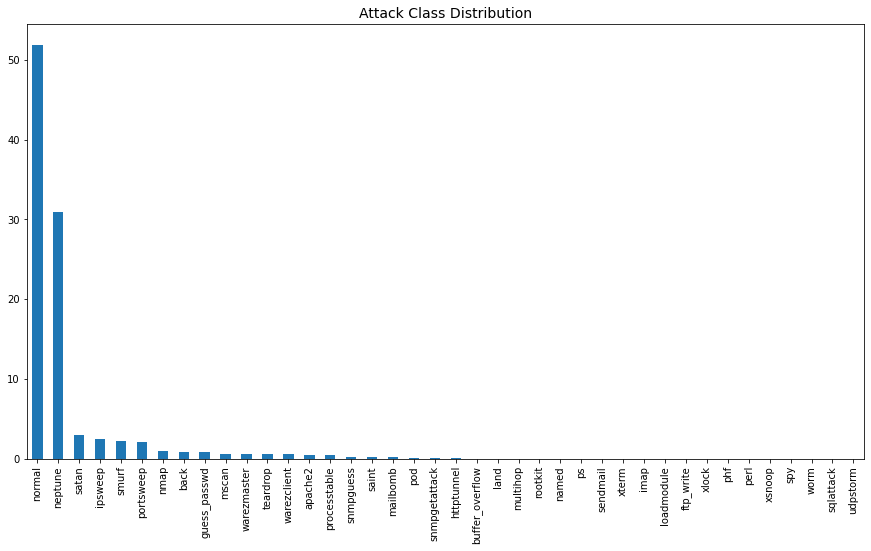

In [ ]:
# Attack class bar plot
plt.figure(figsize=(15,8))
attack_freq_df1['frequency_percent'].plot(kind='bar')
plt.title('Attack Class Distribution', fontsize=14)

In [ ]:
top_15=attack_freq_df1.iloc[:15]
top_15

,attack,frequency_percent
normal,77054,51.88
neptune,45871,30.89
satan,4368,2.94
ipsweep,3740,2.52
smurf,3311,2.23
portsweep,3088,2.08
nmap,1566,1.05
back,1315,0.89
guess_passwd,1284,0.86
mscan,996,0.67


Text(0.5, 1.0, 'Attack Class Distribution')

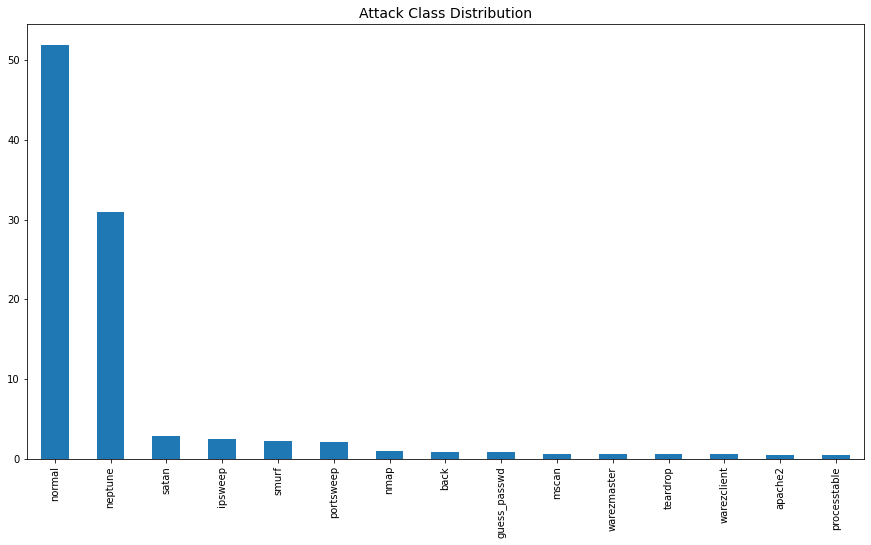

In [ ]:
# Attack class bar plot
plt.figure(figsize=(15,8))
attack_freq_df1['frequency_percent'].iloc[:15].plot(kind='bar')
plt.title('Attack Class Distribution', fontsize=14)

In [ ]:
df4=pd.concat([df1,target],axis=1)
df4

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.588235,0.098039,0.03,0.17,0.00,normal
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.08,0.15,0.00,1.000000,0.003922,0.60,0.88,0.00,normal
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.05,0.07,0.00,1.000000,0.101961,0.05,0.00,0.00,neptune
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.117647,1.000000,0.00,0.03,0.04,normal
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.09,1.000000,1.000000,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,0.5,0.782609,0.9,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.392157,0.552941,0.06,0.01,0.01,normal
22540,0.0,0.5,0.347826,0.9,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.18,0.772549,1.000000,0.00,0.01,0.01,normal
22541,0.0,0.5,0.347826,0.9,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,...,0.0,1.00,0.00,0.20,1.000000,1.000000,0.00,0.00,0.00,back
22542,0.0,1.0,0.173913,0.9,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.33,1.000000,0.988235,0.01,0.00,0.00,normal


In [ ]:
attacks_selected = ['normal', 'neptune', 'satan', 'ipsweep', 'smurf', 'portsweep', 'nmap', 'back', 'guess_passwd', 'mscan', 'warezmaster', 'teardrop', 'warezclient', 'apache2', 'processtable']

In [ ]:
df4['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [ ]:
df4['attack'] = df4['attack'].astype(str)

In [ ]:
df4.loc[:]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.588235,0.098039,0.03,0.17,0.00,normal
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.08,0.15,0.00,1.000000,0.003922,0.60,0.88,0.00,normal
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.05,0.07,0.00,1.000000,0.101961,0.05,0.00,0.00,neptune
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.117647,1.000000,0.00,0.03,0.04,normal
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.09,1.000000,1.000000,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,0.5,0.782609,0.9,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.392157,0.552941,0.06,0.01,0.01,normal
22540,0.0,0.5,0.347826,0.9,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.18,0.772549,1.000000,0.00,0.01,0.01,normal
22541,0.0,0.5,0.347826,0.9,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,...,0.0,1.00,0.00,0.20,1.000000,1.000000,0.00,0.00,0.00,back
22542,0.0,1.0,0.173913,0.9,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.33,1.000000,0.988235,0.01,0.00,0.00,normal


In [ ]:
df4['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [ ]:
mask=df4['attack'].isin(attacks_selected)

In [ ]:
mask

0        True
1        True
2        True
3        True
4        True
         ... 
22539    True
22540    True
22541    True
22542    True
22543    True
Name: attack, Length: 148517, dtype: bool

In [ ]:
df_filtered = df4.loc[mask, :]

In [ ]:
df_filtered

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.588235,0.098039,0.03,0.17,0.00,normal
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.08,0.15,0.00,1.000000,0.003922,0.60,0.88,0.00,normal
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.0,0.05,0.07,0.00,1.000000,0.101961,0.05,0.00,0.00,neptune
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.117647,1.000000,0.00,0.03,0.04,normal
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.09,1.000000,1.000000,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,0.5,0.782609,0.9,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.00,0.392157,0.552941,0.06,0.01,0.01,normal
22540,0.0,0.5,0.347826,0.9,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.18,0.772549,1.000000,0.00,0.01,0.01,normal
22541,0.0,0.5,0.347826,0.9,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,...,0.0,1.00,0.00,0.20,1.000000,1.000000,0.00,0.00,0.00,back
22542,0.0,1.0,0.173913,0.9,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,...,0.0,1.00,0.00,0.33,1.000000,0.988235,0.01,0.00,0.00,normal


In [ ]:
df_filtered['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'back', 'guess_passwd',
       'warezmaster', 'mscan', 'apache2', 'processtable'], dtype=object)

Text(0.5, 0, 'number of components')

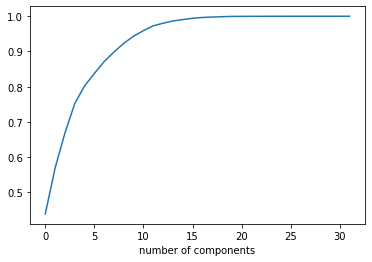

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA


pca=PCA().fit(df_filtered.iloc[:,:-1])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')


In [ ]:
# apply PCA with 12 components
pca = PCA(n_components=12)
pca.fit(df_filtered.iloc[:,:-1])
print(pca.explained_variance_ratio_)
print("Sum",sum(pca.explained_variance_ratio_))

[0.43866101 0.13054178 0.09909749 0.08365382 0.0503055  0.03530437
 0.03390939 0.02702453 0.02470752 0.02030565 0.01568963 0.01374566]
Sum 0.9729463408953196


In [ ]:
# get the 12 most significant columns
most_significant_cols = df_filtered.iloc[:,:-1].columns[pca.explained_variance_.argsort()[::-1][:12]]

# create a new dataframe with the 12 most significant columns
df_reduced = df_filtered[most_significant_cols]
df_reduced

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,0.5,0.782609,0.9,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0
22540,0.0,0.5,0.347826,0.9,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0
22541,0.0,0.5,0.347826,0.9,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0
22542,0.0,1.0,0.173913,0.9,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
df_5=pd.DataFrame(pd.concat([df_reduced,df_filtered.iloc[:,-1]],axis=1))

In [ ]:
df_5 # dataset with pca reduced features [12 features + target]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,attack
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,neptune
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,normal
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,0.5,0.782609,0.9,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,normal
22540,0.0,0.5,0.347826,0.9,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,normal
22541,0.0,0.5,0.347826,0.9,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,back
22542,0.0,1.0,0.173913,0.9,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,normal


In [ ]:
df5_x=df_filtered.iloc[:,:-1]
df5_y=df_filtered.iloc[:,-1]

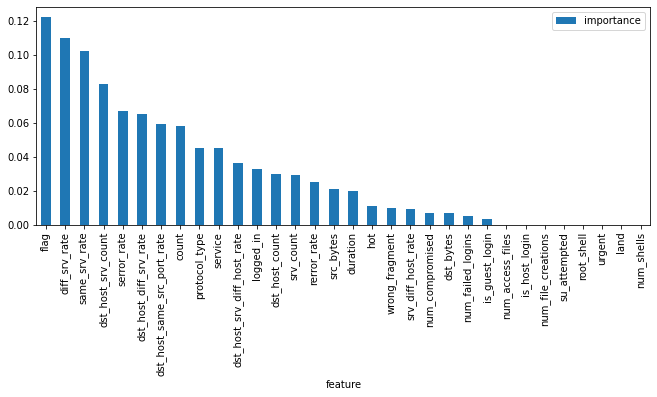

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(df5_x, df5_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':df1.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(df5_x, df5_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), df1.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [ ]:
selected_features

['protocol_type',
 'service',
 'flag',
 'count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate']

In [ ]:
df_selected = df5_x[selected_features]

In [ ]:
df_6=pd.DataFrame(pd.concat([df_selected,df5_y],axis=1))

In [ ]:
df_6 # dataset with rfe selected features [10 features + target]

,protocol_type,service,flag,count,serror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,attack
0,0.5,0.289855,0.9,0.003914,0.0,1.00,0.00,0.098039,0.03,0.17,normal
1,1.0,0.637681,0.9,0.025440,0.0,0.08,0.15,0.003922,0.60,0.88,normal
2,0.5,0.710145,0.5,0.240705,1.0,0.05,0.07,0.101961,0.05,0.00,neptune
3,0.5,0.347826,0.9,0.009785,0.2,1.00,0.00,1.000000,0.00,0.03,normal
4,0.5,0.347826,0.9,0.058708,0.0,1.00,0.00,1.000000,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...
22539,0.5,0.782609,0.9,0.001957,0.0,1.00,0.00,0.552941,0.06,0.01,normal
22540,0.5,0.347826,0.9,0.003914,0.0,1.00,0.00,1.000000,0.00,0.01,normal
22541,0.5,0.347826,0.9,0.009785,0.0,1.00,0.00,1.000000,0.00,0.00,back
22542,1.0,0.173913,0.9,0.007828,0.0,1.00,0.00,0.988235,0.01,0.00,normal


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_6.iloc[:,:-1],df_6.iloc[:,-1],random_state=20,test_size=0.3)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape ,y_test.shape)

(102741, 10) (44032, 10) (102741,) (44032,)


In [ ]:
from sklearn.metrics import f1_score, classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

In [ ]:
def calculateScores(y_test,predictions):
  print('Accuracy  {0:.2f}%'.format(100*accuracy_score(y_test, predictions)))
  print('Precision {0:.2f}%'.format(100*precision_score(y_test,predictions, average='weighted', zero_division=0)))
  print('Recall {0:.2f}%'.format(100*recall_score(y_test,predictions, average='weighted')))
  print('F1 score {0:.2f}%'.format(100*f1_score(y_test,predictions, average='weighted')))


In [ ]:
scaler2 = preprocessing.MinMaxScaler()

scaler2.fit(X_train)

X_train_scaled = scaler2.transform(X_train)
X_test_scaled = scaler2.transform(X_test)


Train Models and Performance Evaluation

In [ ]:
"""
SL algorithms: ANN, SVM, RF, KNN, Logistic Regression
"""

'\nSL algorithms: ANN, SVM, RF, LDA, KNN\nUL algorithms : K-means, Mean-Shift, DBSCAN\n'

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
lr_model = reg.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
calculateScores(y_test,lr_predictions)

Accuracy  92.24%
Precision 89.47%
Recall 92.24%
F1 score 90.40%


In [ ]:
print(classification_report(y_test, lr_predictions, target_names=attacks_selected))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      normal       0.88      0.26      0.40       230
     neptune       0.00      0.00      0.00       418
       satan       0.00      0.00      0.00       376
     ipsweep       0.66      0.98      0.79      1067
       smurf       0.73      0.64      0.68       302
   portsweep       0.99      1.00      0.99     13898
        nmap       0.74      0.22      0.33       496
        back       0.91      0.97      0.94     22941
guess_passwd       0.88      0.83      0.86       950
       mscan       0.88      0.36      0.51       203
 warezmaster       0.85      0.80      0.83      1285
    teardrop       1.00      0.96      0.98      1003
 warezclient       0.62      0.48      0.54       284
     apache2       0.00      0.00      0.00       277
processtable       0.00      0.00      0.00       302

    accuracy                           0.92     44032
   macro avg       0.61      0.50      0.52     44032
weighted avg       0.89   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')#gaussian - radial basis function
svm_model = svm.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
calculateScores(y_test,svm_predictions)

Accuracy  94.96%
Precision 93.47%
Recall 94.96%
F1 score 93.78%


In [ ]:
print(classification_report(y_test, svm_predictions, target_names=attacks_selected))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      normal       0.83      0.92      0.87       230
     neptune       0.00      0.00      0.00       418
       satan       0.72      0.09      0.16       376
     ipsweep       0.69      0.98      0.81      1067
       smurf       0.74      0.71      0.73       302
   portsweep       1.00      1.00      1.00     13898
        nmap       0.89      0.36      0.51       496
        back       0.95      0.99      0.97     22941
guess_passwd       0.98      0.97      0.98       950
       mscan       0.78      0.75      0.76       203
 warezmaster       0.97      0.92      0.94      1285
    teardrop       1.00      0.95      0.97      1003
 warezclient       0.95      0.82      0.88       284
     apache2       0.56      0.56      0.56       277
processtable       0.00      0.00      0.00       302

    accuracy                           0.95     44032
   macro avg       0.74      0.67      0.68     44032
weighted avg       0.93   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model=rf.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
calculateScores(y_test,rf_predictions)

Accuracy  97.29%
Precision 97.19%
Recall 97.29%
F1 score 97.17%


In [ ]:
print(classification_report(y_test, rf_predictions, target_names=attacks_selected))

              precision    recall  f1-score   support

      normal       0.99      0.98      0.98       230
     neptune       0.70      0.52      0.60       418
       satan       0.85      0.82      0.83       376
     ipsweep       0.78      0.92      0.85      1067
       smurf       0.98      0.96      0.97       302
   portsweep       1.00      1.00      1.00     13898
        nmap       0.77      0.49      0.60       496
        back       0.98      0.99      0.99     22941
guess_passwd       0.99      0.99      0.99       950
       mscan       0.85      0.85      0.85       203
 warezmaster       0.97      0.98      0.98      1285
    teardrop       1.00      0.99      1.00      1003
 warezclient       0.95      0.95      0.95       284
     apache2       0.70      0.57      0.63       277
processtable       0.61      0.62      0.62       302

    accuracy                           0.97     44032
   macro avg       0.88      0.84      0.86     44032
weighted avg       0.97   

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
calculateScores(y_test,knn_predictions)

Accuracy  96.74%
Precision 96.63%
Recall 96.74%
F1 score 96.61%


In [ ]:
print(classification_report(y_test, knn_predictions, target_names=attacks_selected))

              precision    recall  f1-score   support

      normal       0.96      0.97      0.97       230
     neptune       0.61      0.50      0.55       418
       satan       0.85      0.79      0.82       376
     ipsweep       0.75      0.92      0.82      1067
       smurf       0.91      0.92      0.92       302
   portsweep       1.00      1.00      1.00     13898
        nmap       0.73      0.44      0.55       496
        back       0.98      0.98      0.98     22941
guess_passwd       0.98      0.99      0.98       950
       mscan       0.82      0.86      0.84       203
 warezmaster       0.96      0.96      0.96      1285
    teardrop       1.00      1.00      1.00      1003
 warezclient       0.95      0.98      0.96       284
     apache2       0.66      0.61      0.63       277
processtable       0.61      0.51      0.55       302

    accuracy                           0.97     44032
   macro avg       0.85      0.83      0.84     44032
weighted avg       0.97   

DBSCAN

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X_train_scaled)

ANN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf
from keras import backend as K

# Define custom metrics
def f1score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    recall = true_positives / (actual_positives + K.epsilon())
    f1score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return K.mean(f1score)

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    recall = true_positives / (actual_positives + K.epsilon())
    return K.mean(recall)

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    return K.mean(precision)


# define the number of classes
num_classes = 15

# Define your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(15, activation='softmax')
])

# compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1score,recall,precision])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 15)                765       
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = sm.fit_resample(X_test_scaled, y_test)

In [ ]:
#Label Encoding of Resampled Data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_label_2 = le.fit_transform(y_resampled)
y_test_label_2 = le.transform(y_test_resampled)


In [ ]:
y_train_encoded_2 = to_categorical(y_train_label_2, num_classes=15)
y_test_encoded_2 = to_categorical(y_test_label_2, num_classes=15)

In [ ]:
history = model.fit(X_resampled, y_train_encoded_2, epochs=3, batch_size=256, validation_data=(X_test_resampled, y_test_encoded_2))

Epoch 1/3
3171/3171 [==============================] - 25s 7ms/step - loss: 0.5501 - accuracy: 0.7957 - f1score: 0.7349 - recall: 0.7143 - precision: 0.8144 - val_loss: 0.3697 - val_accuracy: 0.8543 - val_f1score: 0.1255 - val_recall: 0.1430 - val_precision: 0.1280
Epoch 2/3
3171/3171 [==============================] - 27s 9ms/step - loss: 0.3297 - accuracy: 0.8631 - f1score: 0.8475 - recall: 0.8384 - precision: 0.8838 - val_loss: 0.3084 - val_accuracy: 0.8757 - val_f1score: 0.1333 - val_recall: 0.1482 - val_precision: 0.1350
Epoch 3/3
3171/3171 [==============================] - 20s 6ms/step - loss: 0.2842 - accuracy: 0.8783 - f1score: 0.8694 - recall: 0.8652 - precision: 0.8934 - val_loss: 0.2815 - val_accuracy: 0.8837 - val_f1score: 0.1363 - val_recall: 0.1512 - val_precision: 0.1368


In [ ]:
# evaluate the model
scores = model.evaluate(X_test_resampled, y_test_encoded_2, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print('Test f1score:', scores[2])
print('Test recall:', scores[3])
print('Test precision:', scores[4])

Test loss: 0.28151074051856995
Test accuracy: 0.8837220072746277
Test f1score: 0.09787088632583618
Test recall: 0.09603430330753326
Test precision: 0.10291088372468948


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf
from keras import backend as K

# Define custom metrics
def f1score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    recall = true_positives / (actual_positives + K.epsilon())
    f1score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return K.mean(f1score)

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
    recall = true_positives / (actual_positives + K.epsilon())
    return K.mean(recall)

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
    precision = true_positives / (predicted_positives + K.epsilon())
    return K.mean(precision)


# define the number of classes
num_classes = 15

# Define your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1score,recall,precision])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 15)                495       
                                                                 
Total params: 3,279
Trainable params: 3,279
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train

10990        normal
58158       neptune
4899        neptune
85740       neptune
1714         normal
            ...    
124611      neptune
32037        normal
23833     portsweep
37220     portsweep
92851        normal
Name: attack, Length: 102741, dtype: object

Upsampling
- SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique used to address class imbalance in machine learning problems.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = sm.fit_resample(X_test_scaled, y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_label = le.fit_transform(y_train)
y_test_label = le.transform(y_test)


In [ ]:
#Label Encoding of Resampled Data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_label_2 = le.fit_transform(y_resampled)
y_test_label_2 = le.transform(y_test_resampled)


In [ ]:
X_train_scaled.shape

(102741, 10)

In [ ]:
y_train_encoded = to_categorical(y_train_label, num_classes=15)
y_test_encoded = to_categorical(y_test_label, num_classes=15)

y_train_encoded_2 = to_categorical(y_train_label_2, num_classes=15)
y_test_encoded_2 = to_categorical(y_test_label_2, num_classes=15)

In [ ]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# train the model
# Convert target column to one-hot encoded labels
y_train_label

history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/10
3211/3211 [==============================] - 10s 3ms/step - loss: 0.3406 - accuracy: 0.9100 - f1score: 0.2441 - recall: 0.2467 - precision: 0.2457 - val_loss: 0.2217 - val_accuracy: 0.9315 - val_f1score: 0.2772 - val_recall: 0.2797 - val_precision: 0.2787
Epoch 2/10
3211/3211 [==============================] - 10s 3ms/step - loss: 0.1994 - accuracy: 0.9390 - f1score: 0.2930 - recall: 0.2957 - precision: 0.2938 - val_loss: 0.1909 - val_accuracy: 0.9385 - val_f1score: 0.3012 - val_recall: 0.3033 - val_precision: 0.3027
Epoch 3/10
3211/3211 [==============================] - 8s 3ms/step - loss: 0.1775 - accuracy: 0.9429 - f1score: 0.2989 - recall: 0.3017 - precision: 0.2995 - val_loss: 0.1732 - val_accuracy: 0.9433 - val_f1score: 0.3017 - val_recall: 0.3046 - val_precision: 0.3023
Epoch 4/10
3211/3211 [==============================] - 24s 8ms/step - loss: 0.1647 - accuracy: 0.9462 - f1score: 0.3053 - recall: 0.3078 - precision: 0.3061 - val_loss: 0.1620 - val_accuracy: 0.9466 

In [ ]:
# score = history.evaluate(X_test_scaled, y_test_encoded, verbose=0)
# print(score)

In [ ]:
# train the model
history2 = model.fit(X_resampled, y_train_encoded_2, epochs=10, batch_size=32, validation_data=(X_test_resampled, y_test_encoded_2))

Epoch 1/10
25366/25366 [==============================] - 77s 3ms/step - loss: 0.2612 - accuracy: 0.8877 - f1score: 0.7721 - recall: 0.7820 - precision: 0.7902 - val_loss: 0.2616 - val_accuracy: 0.8832 - val_f1score: 0.0990 - val_recall: 0.0971 - val_precision: 0.1037
Epoch 2/10
25366/25366 [==============================] - 76s 3ms/step - loss: 0.2267 - accuracy: 0.8983 - f1score: 0.7844 - recall: 0.7942 - precision: 0.8001 - val_loss: 0.2467 - val_accuracy: 0.8935 - val_f1score: 0.0999 - val_recall: 0.0979 - val_precision: 0.1041
Epoch 3/10
25366/25366 [==============================] - 97s 4ms/step - loss: 0.2143 - accuracy: 0.9026 - f1score: 0.7886 - recall: 0.7986 - precision: 0.8032 - val_loss: 0.2345 - val_accuracy: 0.9014 - val_f1score: 0.1004 - val_recall: 0.0988 - val_precision: 0.1042
Epoch 4/10
25366/25366 [==============================] - 75s 3ms/step - loss: 0.2064 - accuracy: 0.9054 - f1score: 0.7911 - recall: 0.8010 - precision: 0.8048 - val_loss: 0.2290 - val_accuracy

Improved accuracy by increasing no. of layers of ANN and epochs

In [ ]:
# evaluate the model
score2 = model.evaluate(X_test_resampled, y_test_encoded_2, verbose=0)
# print(score2)
# print('Test loss:', score2[0])
print('Test accuracy:', score2[1])
# print('Test f1score:', score2[2])
# print('Test recall:', score2[3])
# print('Test precision:', score2[4])

Test accuracy: 0.9082806706428528


In [ ]:
y_pred = model.predict(X_test_resampled)
y_pred = np.argmax(y_pred, axis=1)


10754/10754 [==============================] - 15s 1ms/step


In [ ]:
print(classification_report(y_test_label_2, y_pred, target_names=attacks_selected))


              precision    recall  f1-score   support

      normal       1.00      0.99      1.00     22941
     neptune       0.92      0.98      0.95     22941
       satan       0.92      0.86      0.89     22941
     ipsweep       0.69      0.80      0.74     22941
       smurf       0.99      0.98      0.98     22941
   portsweep       1.00      1.00      1.00     22941
        nmap       0.75      0.64      0.69     22941
        back       0.93      0.83      0.88     22941
guess_passwd       1.00      1.00      1.00     22941
       mscan       0.89      1.00      0.94     22941
 warezmaster       0.99      0.99      0.99     22941
    teardrop       1.00      0.99      1.00     22941
 warezclient       1.00      0.98      0.99     22941
     apache2       0.83      0.77      0.80     22941
processtable       0.75      0.81      0.78     22941

    accuracy                           0.91    344115
   macro avg       0.91      0.91      0.91    344115
weighted avg       0.91   